# Project 2: Reproducibility in Natural Language Processing



## Part 1: Data Loading and Initial Exploration (15 pts)

The state of union speech data for this project is stored in the `data` folder in the `SOTU.csv` file. The data file is structured as a CSV with columns for president name, speech text, year, and word count in the speech. 

We create the `conda` environment with the provided environment.yaml file. 

### Read Data

In [4]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark') 

In [5]:
# read in SOTU.csv 
sou = pd.read_csv('data/SOTU.csv')
sou.head()

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169


### Exploratory Data Analysis
We start with EDA to summarize the dataset and determine if any patterns or relationships exists between the variables. The mention of speeches refers to the State of the Union speeches. The five plots we create are:
1) Number of Speeches per President
2) Number of Speeches per Year
3) Distribution of Word Count
4) Distribution of Word Count over the years
5) Distribution of Word Count per President 

#### Number of Speeches per President

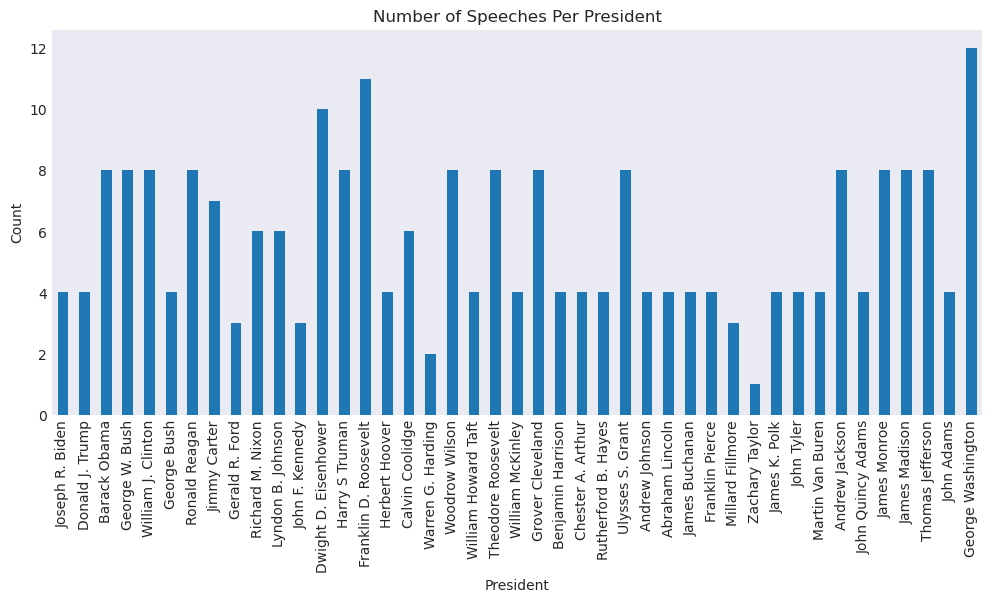

In [6]:
# find number of speeches per president 
speech_pres = sou['President'].value_counts().reindex(sou["President"].unique())

#bar plot 
fig, ax = plt.subplots(figsize=(12, 5))
speech_pres.plot(kind = 'bar')
plt.title('Number of Speeches Per President')
plt.xlabel('President')
plt.ylabel('Count');
plt.savefig('outputs/num_speeches_per_pres.png', dpi=300, bbox_inches='tight')

We created a bar plot for the number of speeches given by each president from 1970-2024. There are 43 presidents in the data set, so not all presidents who served during 1970-2024 are included. The number of speeches range from 1 to 12, with the majority of presidents giving 4 speeches and a few giving more than 8 speeches. State of the Union speeches are given annually, so we expect that most presidents would give 4 or 8 speeches (4 speeches per term). George Washington gave the most speeches (12 speeches) and Zachary Taylor gave the least (1 speech). George Washington served as president for 8 years, so it is suprising that he gave more than 8 speeches. On the other hand, Zachary Taylor was only president for a year so it makes sense that he only give one speech. The president who had the longest presidential term was Franklin D. Roosevelt, who served for 11 years and has the second-highest speech count (11 speeches).  

#### Number of Speeches per Year

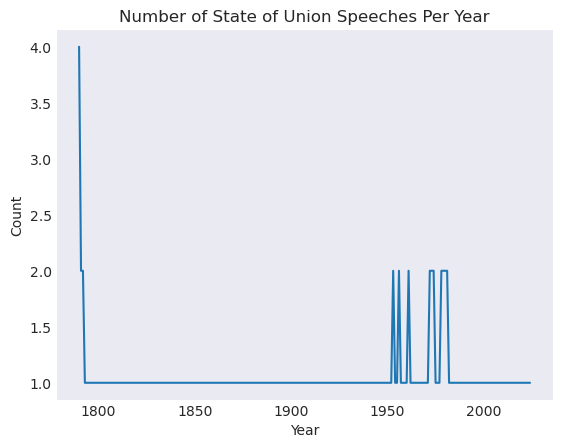

In [7]:
# speeches per year
speech_year = sou['Year'].value_counts().sort_index()

#line plot
speech_year.plot()
plt.title('Number of State of Union Speeches Per Year')
plt.xlabel('Year')
plt.ylabel('Count');
plt.savefig('outputs/num_speeches_per_year.png', dpi=300, bbox_inches='tight')

We created a lineplot of number of speeches per year. The years in the dataset range from 1790 to 2024 and the count of speeches per year ranges from 1 to 4. The majority of the years had 1 speech, which was expected since State of the Union speeches are given annually. The greatest number of speeches was 4 in 1790, which was during George Washginton's term. This accounts for why Washington had 12 speeches despite only serving two terms. A few years have 2 speeches, which could correspond to presidents that had more than 8 speeches. 

#### Word Count Distribution 

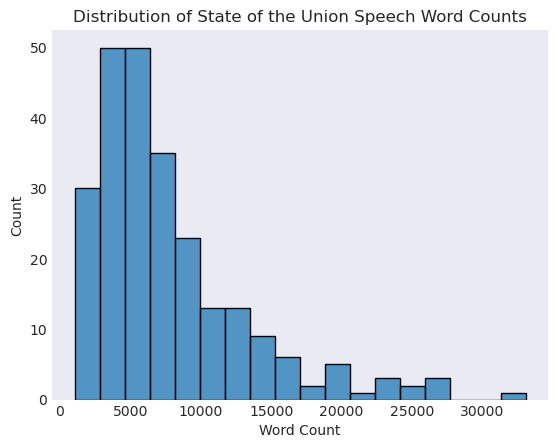

In [8]:
#histogram of word count
sns.histplot(sou['Word Count'], bins = 18)
plt.title('Distribution of State of the Union Speech Word Counts');
plt.savefig('outputs/speech_word_count.png', dpi=300, bbox_inches='tight')

We created a histogram of the distribution of word counts in speeches. The distribution is right skewed, with few speeches (less than 10 speeches) having more than 15,000 words. The majority of speeches have around 3,400 to 6,700 words. The plot shows that there is a gap on the right end that is followed by one speech with more than 30,000 words, which can be an outlier. 

#### Word Count Distribution over Year

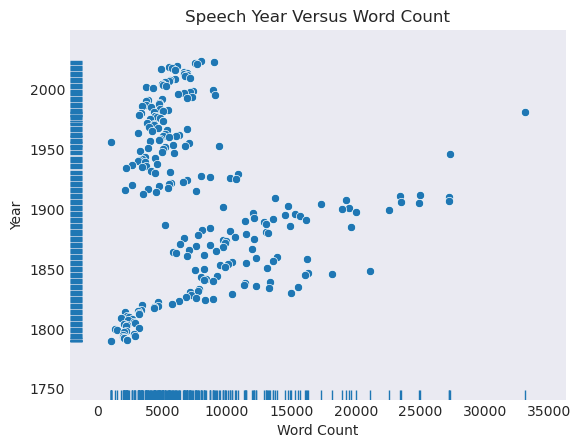

In [9]:
# rugplot of word count distribution per year
sns.scatterplot(x = sou['Word Count'], y = sou['Year'])
sns.rugplot(x = sou['Word Count'], y = sou['Year'])
plt.title('Speech Year Versus Word Count');
plt.savefig('outputs/year_vs_word_count.png', dpi=300, bbox_inches='tight')

We created a rugplot for the distribution of word count and year. The plot also shows a scatterplot of word count per year (note that the y-axis is Year and x-axis is word count). The rugplot for word counts shows thicker bars for lower word counts, which represents a higher density, indicating a right skew like in the previous histogram of word count distribution. The scatterplot also shows some overplotting for points in the range of these lower word counts, indicating that most years had speeches with a word count less than 15,000. There are a couple points with a word count greater than 15,000. 

#### Word Count Distribution per President

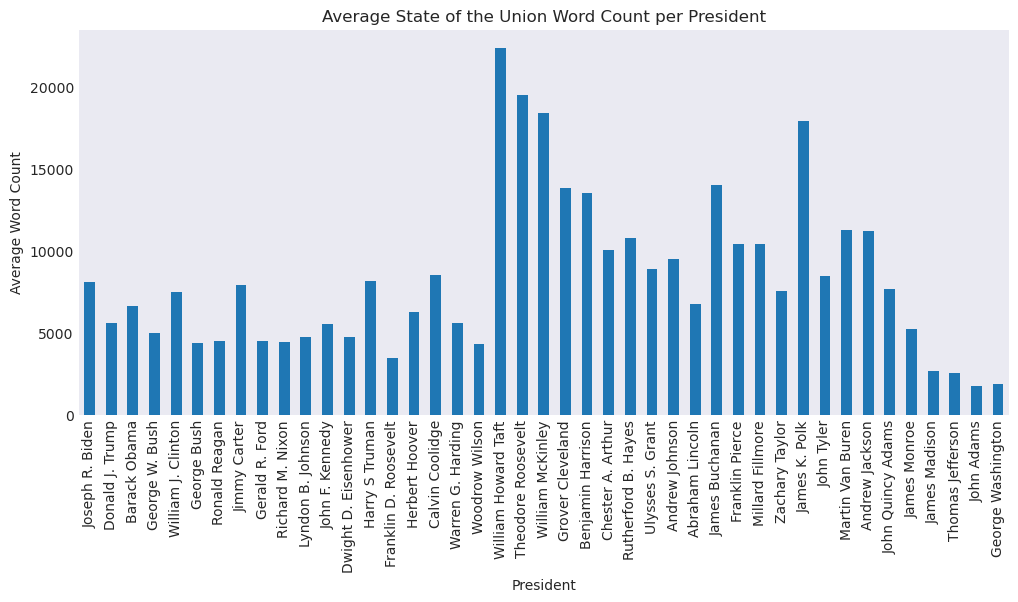

In [10]:
# mean word count per president
word_count_pres = sou.groupby('President')['Word Count'].mean().reindex(sou["President"].unique())

#bar plot
fig, ax = plt.subplots(figsize=(12, 5))
word_count_pres.plot(kind = 'bar')
plt.title('Average State of the Union Word Count per President')
plt.ylabel('Average Word Count');
plt.savefig('outputs/word_count_per_pres.png', dpi=300, bbox_inches='tight')

We found the average word count per president and created a bar plot. Each bar represents the average number of words in a State of the Union speech given by the president. The majority of presidents had less than 10,000 average words. William Howard Taft had the greatest average word count at more than 20,000 words, while John Adams had the lowest average word count. Notice that although George Washington gave the most speeches, he had one of the lowest average word counts in his speeches. The average word count was lowest for the first few presidents, which are located at the right end of the plot. Research shows that the first few presidents tended to give short speeches since they were personally delivered (spoken rather than delivered as a written report). Thomas Jefferson started a tradition of writing down the speech in the 19th century until personal delivery was revived by Woodrow Wilson. This accounts for the increase in average word count for presidents after Thomas Jefferson and a sudden decrease for Woodrow Wilson and subsequent presidents.

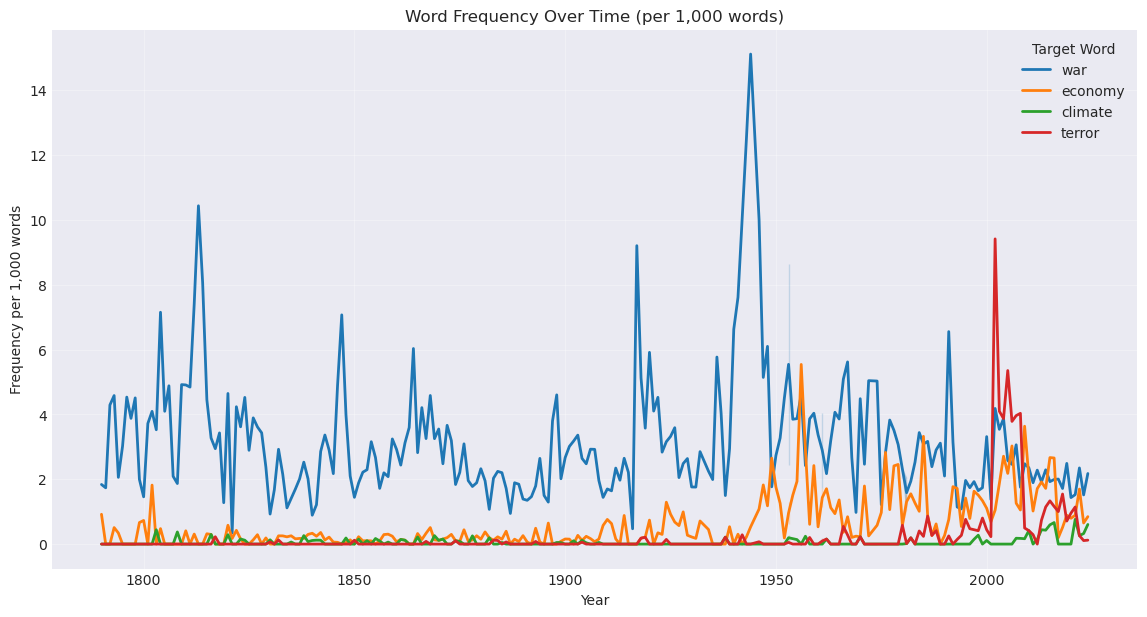


COMMENTARY FOR PART 4:
This analysis tracks the relative frequency of specific keywords over time. 
We normalized the counts (per 1,000 words) to account for varying speech lengths.
- 'War' shows distinct spikes during WWII (1940s), Vietnam (1960s), and post-9/11 (2002).
- 'Economy' tends to spike during recessions (early 1980s, 2009).
- 'Climate' is a strictly modern term, likely appearing only after the 1990s.



In [13]:
# PART 4: WORD FREQUENCY OVER TIME (Choose Your Own Adventure #1)

import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas as pd


def plot_word_frequency_over_time(df, target_words):
    data_rows = []
    for index, row in df.iterrows():
        year = row['Year']
        text = row['Text'].lower() 
        
        
        total_words = len(text.split())
        
        if total_words == 0: continue
            
        for word in target_words:
           
            count = text.count(word)
            
            freq_per_1k = (count / total_words) * 1000
            
            data_rows.append({
                'Year': year,
                'Word': word,
                'Frequency': freq_per_1k
            })
            
    freq_df = pd.DataFrame(data_rows)
    
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=freq_df, x='Year', y='Frequency', hue='Word', linewidth=2)
    
    plt.title('Word Frequency Over Time (per 1,000 words)')
    plt.ylabel('Frequency per 1,000 words')
    plt.xlabel('Year')
    plt.grid(True, alpha=0.3)
    plt.legend(title='Target Word')
    plt.show()


interesting_words = ['war', 'economy', 'climate', 'terror']

plot_word_frequency_over_time(sou, interesting_words)